#**Tugas Besar II Pemodelan Simulasi**<br>
#Nama : Marcello Rasel Hidayatullah<br>
#NIM  : 1301184019

In [96]:
# Install Module Celluloid
!pip install celluloid

In [97]:
# Import Libraries
import random
import matplotlib.pyplot as plt
from celluloid import Camera as Camera
from IPython.display import HTML

#Inisialisasi Variabel

## Inisialisasi Variabel Scalar

In [98]:
jml_indiv = 200           # Jumlah individu 200
rasio_infeksi = 0.05      # Rasio individu terinfeksi 5% 
pemulihan = 10            # Waktu pemulihan 10 hari
prob_gerak = 0.8          # Probabilitas individu bergerak 80%
x_max = 20                # Ukuran ruang simulasi 20x20 unit
x_min = 0
jarak_x = (x_max - x_min)
y_max = 20                # Ukuran ruang simulasi 20x20 unit
y_min = 0
jarak_y = (y_max - y_min)

## Inisialisasi Variabel List

In [99]:
stat_kesehatan = []
stat_imun = []
waktu_infeksi = []
total_terinfeksi = []
temp_infek = int(jml_indiv * rasio_infeksi) # Menampung sementara jumlah individu yang terkena infeksi
posisi_x = []
posisi_y = []
x_sehat = [0]
x_terinfeksi = [0]
y_sehat = [0]
y_terinfeksi = [0]

#Iterasi

In [100]:
# Inisialisasi posisi individu
for i in range(jml_indiv):
    posisi_x.append(random.randint(x_min, x_max))
    posisi_y.append(random.randint(y_min, y_max))
    # Status kesehatan
    if (i < temp_infek):
        stat_kesehatan.append(True)
    else:
        stat_kesehatan.append(False)
    # Status imunitas
    stat_imun.append(False)
    # Waktu terinfeksi
    waktu_infeksi.append(0)

In [101]:
# Update posisi individu
def update_posisi(x, y):
    posisi_acak = random.random()
    if (posisi_acak <= 0.2):
        x = x + 1               # x bergerak ke kanan            
    elif (posisi_acak <= 0.4):
        y = y - 1               # y bergerak ke bawah
    elif (posisi_acak <= 0.6):
        x = x - 1               # x bergerak ke kiri
    elif (posisi_acak <= 0.8):
        y = y + 1               # y bergerak ke atas
    return [x, y]

In [102]:
# PBC (Periodic Boundary Condition)
def pbc(x, y):
    if (x > x_max):
        x = x - jarak_x
    elif (x < x_min):
        x = x + jarak_x
    elif (y > y_max):
        y = y - jarak_y
    elif (y < y_min):
        y = y + jarak_y
    return [x, y]

In [103]:
# Posisi individu sehat dan individu terinfeksi
def status_individu(x, y, posisi_x, posisi_y):
    i = 0
    status = False
    while ((status == False) & (i < jml_indiv)):
        if ((stat_kesehatan[i]) & (posisi_x[i] == x) & (posisi_y[i] == y)):
            status = True
        i = i + 1
    return status

## Challenge 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


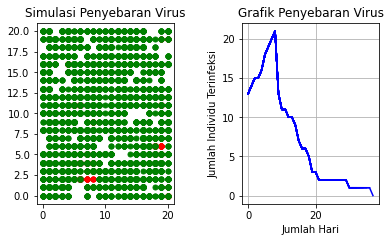

In [104]:
# Iterasi
hari = 0
Cam = Camera(plt.figure())
while (temp_infek > 0):
    hari += 1
    for idv in range(jml_indiv):
        # Update posisi berdasarkan probabilitas individu bergerak
        prob_acak = random.uniform(0,1)
        if (prob_acak >= prob_gerak):
            pindah_posisi = update_posisi(posisi_x[idv], posisi_y[idv])
        else:
            pindah_posisi = [posisi_x[idv], posisi_y[idv]]    
        # Koreksi posisi dengan PBC
        koreksi = pbc(pindah_posisi[0], pindah_posisi[1])
        # Update waktu terinfeksi individu
        if (stat_kesehatan[idv]):
            waktu_infeksi[idv] = waktu_infeksi[idv] + 1
        # Update status kesehatan individu - recovery
        if (waktu_infeksi[idv] >= pemulihan):
            stat_imun[idv] = True
            stat_kesehatan[idv] = False
            waktu_infeksi[idv] = 0
            temp_infek = temp_infek - 1
        # Update status kesehatan individu – infection
        if (~stat_imun[idv] & ~stat_kesehatan[idv] & status_individu(koreksi[0], koreksi[1], posisi_x, posisi_y)):
            stat_kesehatan[idv] = True
            temp_infek = temp_infek + 1
        # Update posisi terbaru
        posisi_x[idv] = koreksi[0]
        posisi_y[idv] = koreksi[1]
        if (stat_kesehatan[idv]):
            x_terinfeksi.append(posisi_x[idv])
            y_terinfeksi.append(posisi_y[idv])
        else:
            x_sehat.append(posisi_x[idv])
            y_sehat.append(posisi_y[idv])
    # Total individu terinfeksi
    total_terinfeksi.append(temp_infek)

    # Plot jumlah individu yang terinfeksi
    plt.figure(1)
    plt.subplot(1, 2, 1)
    plt.scatter(x_sehat, y_sehat, c="green", s=25)
    plt.scatter(x_terinfeksi,y_terinfeksi, c="red", s=25)
    plt.title("Simulasi Penyebaran Virus")
    plt.subplot(1, 2, 2)
    plt.plot(total_terinfeksi, c='blue')
    Cam.snap()
    
    x_terinfeksi = []
    y_terinfeksi = []
    x_sehat = []
    y_sehat = []

plt.grid(True, which="both")
plt.title("Grafik Penyebaran Virus")
plt.xlabel('Jumlah Hari')
plt.ylabel('Jumlah Individu Terinfeksi')
plt.tight_layout(pad=3.0)
plt.show()

In [109]:
#Jumlah
print('================================================')
print('Jumlah individu            :',jml_indiv)
print('Jumlah Individu Terinfeksi :',max(total_terinfeksi))
print('Jumlah Hari                :',hari)

Jumlah individu            : 200
Jumlah Individu Terinfeksi : 21
Jumlah Hari                : 38


## Challenge 2

In [105]:
# Simulasi Bergerak
simulasi = Cam.animate(interval=1000)
HTML(simulasi.to_html5_video())